In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import missingno as msno
import os
import wget
import openpyxl
import math

<Axes: >

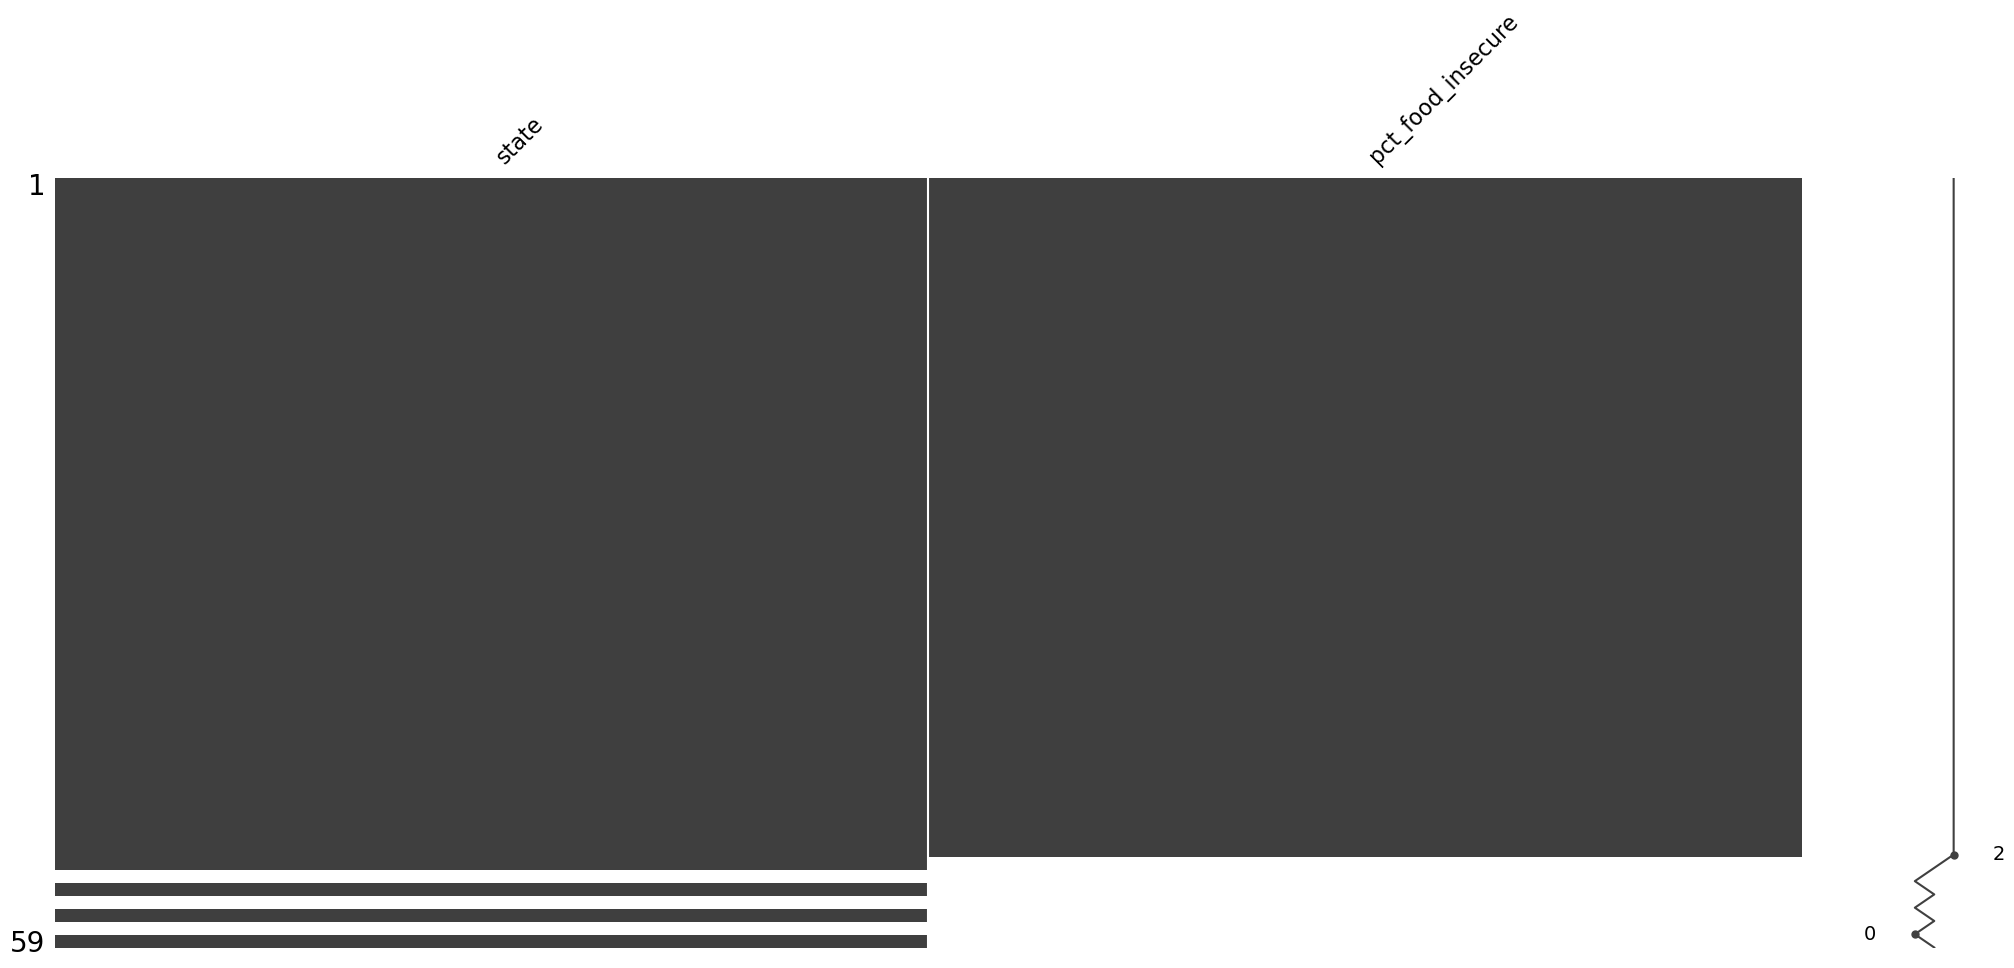

In [2]:
# download the data excel file from the USDA website to local folder
filename = wget.download("https://www.ers.usda.gov/media/rbmpu1zi/mapdata2021.xlsx")
# load the excel file into a pandas dataframe & skip header rows
df = pd.read_excel(os.getcwd()+'/mapdata2021.xlsx',skiprows=4)
# rename the columns of interest
df = df.rename(columns={'Unnamed: 0':'state',
                       'Percent':'pct_food_insecure'})
# retain only the columns of interest
df = df[['state','pct_food_insecure']]

# take a look at the dataframe for missing values
msno.matrix(df)

<Axes: >

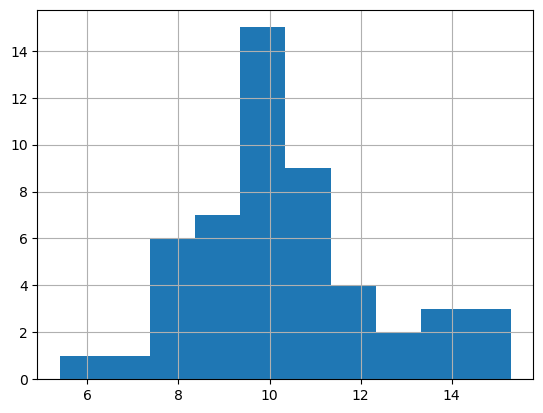

In [3]:
df = df[df.state.str.len()==2]
df.pct_food_insecure.hist()

In [4]:
wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")

'cb_2018_us_state_500k (1).zip'

In [5]:
gdf = gpd.read_file('data/cb_2018_us_state_500k.shp')
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [6]:
gdf = gdf.merge(df,left_on='STUSPS',right_on='state')
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,pct_food_insecure
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",MS,15.3
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",NC,10.9
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",OK,13.8
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",VA,7.8
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",WV,14.0


<Axes: >

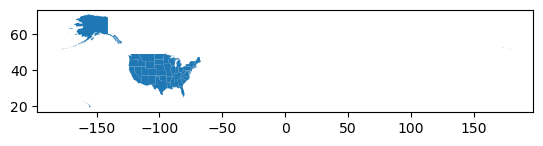

In [7]:
gdf.plot()

C:\Users\Wonyoung\AppData\Local\Temp\ipykernel_14740\4046812394.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


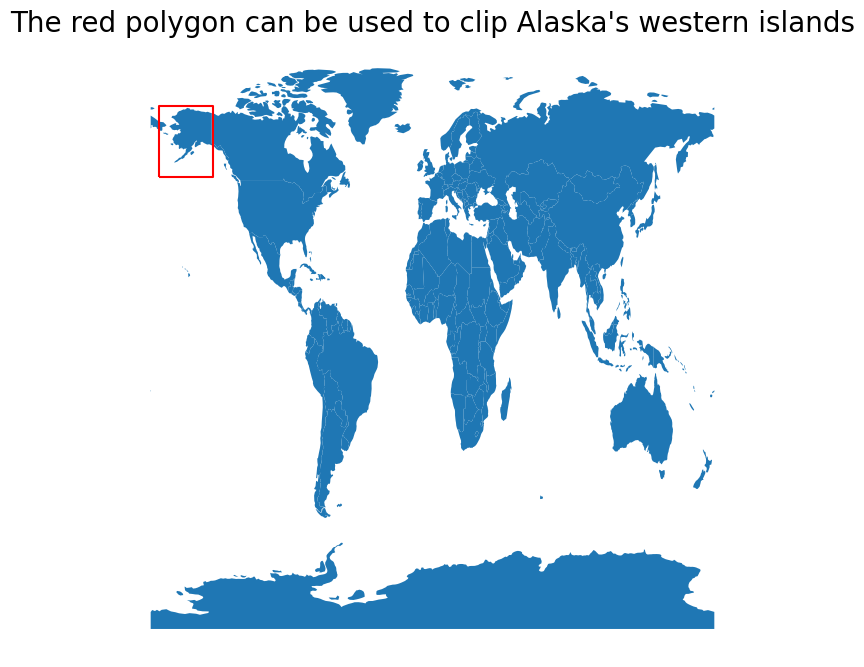

In [8]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
polygon = Polygon([(-175,50),(-175,72),(-140, 72),(-140,50)])
# polygon = Polygon([(-180,0),(-180,90),(-120,90),(-120,0)])

# polygon=hipolygon
poly_gdf = gpd.GeoDataFrame( geometry=[polygon], crs=world.crs)

fig, ax1 = plt.subplots(1, figsize=(8, 18))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax = ax1, color="red")
ax1.set_title("The red polygon can be used to clip Alaska's western islands", fontsize=20)
ax1.set_axis_off()
plt.show()

In [9]:
gdf = gdf.merge(df,left_on='STUSPS',right_on='state')
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state_x,pct_food_insecure_x,state_y,pct_food_insecure_y
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",MS,15.3,MS,15.3
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",NC,10.9,NC,10.9
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",OK,13.8,OK,13.8
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",VA,7.8,VA,7.8
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",WV,14.0,WV,14.0


In [10]:
gdf.to_crs({'init':'epsg:2163'})

C:\Users\Wonyoung\AppData\Roaming\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state_x,pct_food_insecure_x,state_y,pct_food_insecure_y
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((1109990.968 -1565553.473, 1111...",MS,15.3,MS,15.3
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((2154835.730 -692236.318, 21554...",NC,10.9,NC,10.9
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-268956.153 -936541.911, -268644.290...",OK,13.8,OK,13.8
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((2098181.788 -490386.322, 20982...",VA,7.8,VA,7.8
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((1506493.502 -601384.449, 1506500.488...",WV,14.0,WV,14.0
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((1079314.605 -1608998.456, 1079...",LA,14.5,LA,14.5
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((1376552.929 -187673.161, 13766...",MI,11.4,MI,11.4
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((2420821.628 34539.216, 2421740...",MA,8.4,MA,8.4
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-1357097.048 78008.665, -1356418.733...",ID,9.8,ID,9.8
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((1997737.502 -1929546.629, 1997...",FL,9.9,FL,9.9
